In [1]:
import pandas as pd

In [4]:
import os
from PIL import Image

# Directory containing your images
image_dir = "documents"

# List all files in the directory
image_files = os.listdir(image_dir)

# Open each image file
images = [Image.open(os.path.join(image_dir, file)) for file in image_files if file.endswith(('.png', '.jpg', '.jpeg'))]

show first image

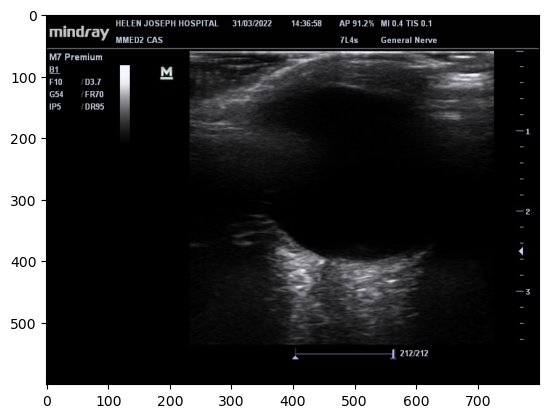

In [5]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(images[0])
plt.show()

Mapping ONSD measurements to images to create labels

In [7]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = r"Meta_pic.xlsx"
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['label'] = df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Now let's proceed to match and rename the images
documents_dir = './documents'  # Assuming this is your correct directory path

# Iterate over the DataFrame to match, rename images and create an ONSD mapping dictionary
image_onsd_mapping = {}
for index, row in df.iterrows():
    image_name_to_look_for = row['label']
    onsd_value = row['onsd']
    image_path = os.path.join(documents_dir, image_name_to_look_for)

    if os.path.exists(image_path):
        image_onsd_mapping[image_name_to_look_for] = onsd_value
    else:
        print(f"No matching file found for label: {image_name_to_look_for}")

# Convert to float if necessary
onsd_value = float(row['onsd'])

# Display the ONSD mapping
for image_name, onsd_value in image_onsd_mapping.items():
    print(f"{image_name}: {onsd_value}")


MMED-002_image_data_1_raw_image.jpg: 5
MMED-002_image_data_2_raw_image.jpg: 5
MMED-003_image_data_1_raw_image.jpg: 5
MMED-004_image_data_1_raw_image.jpg: 5
MMED-004_image_data_2_raw_image.jpg: 5
MMED-005_image_data_1_raw_image.jpg: 5
MMED-005_image_data_2_raw_image.jpg: 4
MMED-006_image_data_1_raw_image.jpg: 5
MMED-006_image_data_2_raw_image.jpg: 5
MMED-007_image_data_1_raw_image.jpg: 4
MMED-007_image_data_2_raw_image.jpg: 5
MMED-008_image_data_1_raw_image.jpg: 5
MMED-008_image_data_2_raw_image.jpg: 5
MMED-009_image_data_1_raw_image.jpg: 4
MMED-010_image_data_1_raw_image.jpg: 5
MMED-010_image_data_2_raw_image.jpg: 6
MMED-011_image_data_1_raw_image.jpg: 4
MMED-011_image_data_2_raw_image.jpg: 4
MMED-012_image_data_1_raw_image.jpg: 4
MMED-012_image_data_2_raw_image.jpg: 4
MMED-013_image_data_1_raw_image.jpg: 4
MMED-013_image_data_2_raw_image.jpg: 5
MMED-014_image_data_1_raw_image.jpg: 5
MMED-014_image_data_2_raw_image.jpg: 5
MMED-015_image_data_1_raw_image.jpg: 5
MMED-015_image_data_2_raw

Create a csv file in this directory which have the image: measurement mapping

In [8]:
import pandas as pd

# Convert your dictionary to a DataFrame
df_onsd = pd.DataFrame(list(image_onsd_mapping.items()), columns=['filename', 'label'])

# Save this DataFrame to a CSV file
df_onsd.to_csv('image_labels.csv', index=False)


Experiment with Cropping of images

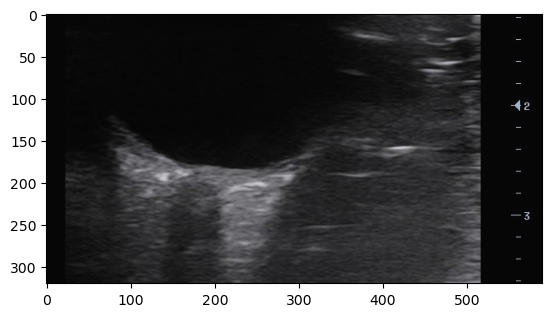

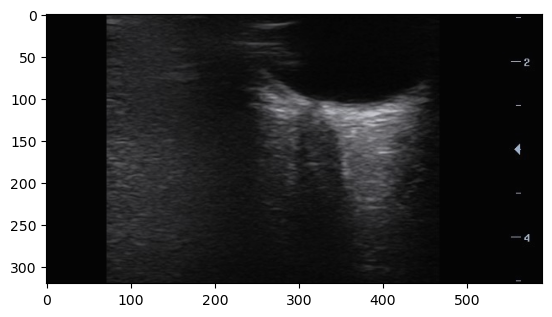

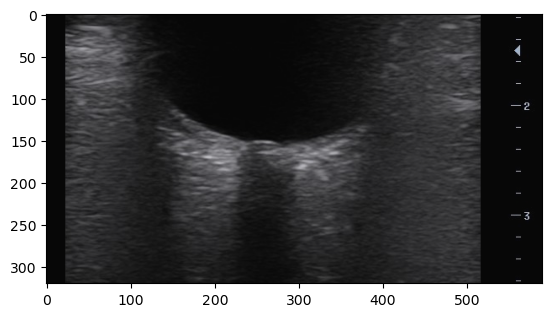

In [9]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Function to calculate crop coordinates and enhance contrast
def process_image(image_path, contrast_factor=0.5):
    with Image.open(image_path) as img:
        # Crop the image
        crop_box = (210, 210, 800, 530)
        cropped_img = img.crop(crop_box)
          # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(contrast_factor)
        return enhanced_img

# List your image paths here
image_paths = [
    'documents/MMED-009_image_data_1_raw_image.jpg',
    'documents/MMED-012_image_data_2_raw_image.jpg',
    'documents/MMED-017_image_data_2_raw_image.jpg'
]

# Adjust the contrast factor as needed
contrast_factor = 0.8


# This will iterate over the first three image paths, process them, and display them inline
for path in image_paths[:3]:
    processed_image = process_image(path, contrast_factor)
    plt.figure()
    plt.imshow(processed_image)
    plt.show()



Process Images: Crop and Enhance Contrast

In [11]:
from PIL import Image, ImageEnhance
import os

# Define the coordinates of the crop box (left, upper, right, lower)
crop_box = (210, 210, 800, 530)

# Path to the directory containing the images
image_dir = r"documents"  # Replace with the path to your image directory

# New directory to store processed images
processed_dir = os.path.join(image_dir, 'processed_images')
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# List of all image filenames
image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_filename in image_filenames:
    image_path = os.path.join(image_dir, image_filename)
    with Image.open(image_path) as img:
        # Crop the image
        cropped_img = img.crop(crop_box)
        # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(0.8)  # Contrast factor of 10
        # Save the processed image in the 'processed_images' directory
        enhanced_img.save(os.path.join(processed_dir, f"enhanced_{image_filename}"))

print(f"Processed images are saved in {processed_dir}")




Processed images are saved in documents\processed_images


Creating a CSV with measurements linked to processed images in the same file

In [8]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = r"C:\Users\parkera\OneDrive - phru.co.za\Documents\Python Scripts\Datasheet.xlsx"
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['processed_label'] = 'enhanced_' + df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Define the directory containing your processed images
processed_images_dir = r"C:\Users\parkera\OneDrive - phru.co.za\Pictures\MMED\documents\processed_images"  

# Create a new DataFrame to store image names and corresponding ONSD measurements
image_measurements = []

# Iterate over the DataFrame to find matches in the processed_images directory
for index, row in df.iterrows():
    processed_image_name = row['processed_label']
    onsd_value = row['onsd']
    image_path = os.path.join(processed_images_dir, processed_image_name)

    if os.path.exists(image_path):
        # If a matching processed image is found, append the details to the list
        image_measurements.append({'image_filename': processed_image_name, 'onsd_measurement': f"{onsd_value:.1f}"})
    else:
        print(f"No matching file found for label: {processed_image_name}")

# Convert the list to a DataFrame
image_measurements_df = pd.DataFrame(image_measurements)

# Save this DataFrame to a CSV file in the processed_images directory
csv_file_path = os.path.join(processed_images_dir, 'image_measurements.csv')
image_measurements_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved to {csv_file_path}")


CSV file saved to C:\Users\parkera\OneDrive - phru.co.za\Pictures\MMED\documents\processed_images\image_measurements.csv


Importing Libaries for simple CNN attempt for regression task of measuring ONSD

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image


Load and split processed image data

In [10]:
import pandas as pd
import os
from PIL import Image
import numpy as np

# Correct base directory for your processed images
base_dir = r"C:\Users\parkera\OneDrive - phru.co.za\Pictures\MMED\documents\processed_images"

# Assuming you have 'image_measurements.csv' in the same directory as your processed images
csv_file = os.path.join(base_dir, 'image_measurements.csv')
df = pd.read_csv(csv_file)

# Function to load images based on the corrected path
def load_images(df, base_dir):
    images = []
    for _, row in df.iterrows():
        image_path = os.path.join(base_dir, row['image_filename'])
        try:
            with Image.open(image_path) as img:
                img = img.resize((128, 128))  # Resize for uniformity
                img_array = np.array(img)
                images.append(img_array)
        except FileNotFoundError:
            print(f"File not found: {image_path}")
    return np.array(images)

images = load_images(df, base_dir)
onsd_measurements = df['onsd_measurement'].values

# Normalize images
images = images / 255.0

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, onsd_measurements, test_size=0.306, random_state=42)


Simple CNN model architecture

In [11]:
from keras.layers import Input  # Import the Input layer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf 

def build_model():
    model = Sequential([
        Input(shape=(128, 128, 3)),  # Input layer added
        Conv2D(32, (3, 3), activation='relu'),  # input_shape removed 
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1) # Single output node for regression
    ])
    return model

In [12]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mae'])  # MSE is a common loss for regression


In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - loss: 14.5757 - mae: 3.4130 - val_loss: 2.9409 - val_mae: 1.5373
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 3.6628 - mae: 1.6715 - val_loss: 2.2268 - val_mae: 1.1663
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 2.5127 - mae: 1.2140 - val_loss: 1.9046 - val_mae: 1.2249
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 2.0922 - mae: 1.2068 - val_loss: 1.5078 - val_mae: 1.0600
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 1.8399 - mae: 1.0805 - val_loss: 1.8708 - val_mae: 1.2775
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 1.9815 - mae: 1.2094 - val_loss: 0.7786 - val_mae: 0.7389
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 1.2770 - mae: 0.8826 - val_loss: 0.8758 - val_mae: 0.8373
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 1.3183 - mae: 0.9740 - val_loss: 0.1907 - val_mae: 0.3473
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.8059 - mae:

In [14]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3448 - mae: 0.5202
Test MAE: 0.5190597772598267


In [15]:
# Make predictions
predictions = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [16]:
for i in range(len(predictions)):
    print(f"Predicted: {predictions[i][0]}, Actual: {y_test[i]}")


Predicted: 4.99652099609375, Actual: 6.0
Predicted: 4.666243553161621, Actual: 4.9
Predicted: 4.521692752838135, Actual: 4.9
Predicted: 4.77933406829834, Actual: 5.4
Predicted: 4.574690818786621, Actual: 4.9
Predicted: 4.295413017272949, Actual: 4.8
Predicted: 4.748432159423828, Actual: 5.9
Predicted: 4.696922779083252, Actual: 5.2
Predicted: 4.8299455642700195, Actual: 4.7
Predicted: 4.5660529136657715, Actual: 5.0
Predicted: 4.771267890930176, Actual: 5.5
Predicted: 4.69765043258667, Actual: 5.0
Predicted: 4.683479309082031, Actual: 5.2
Predicted: 4.768787384033203, Actual: 5.3
Predicted: 4.144534111022949, Actual: 4.7
Predicted: 4.939925193786621, Actual: 5.2
Predicted: 5.3195085525512695, Actual: 4.4
Predicted: 4.46471643447876, Actual: 5.4
Predicted: 4.712529182434082, Actual: 5.2
Predicted: 4.605075836181641, Actual: 5.0
Predicted: 4.687527656555176, Actual: 5.0
Predicted: 4.634069919586182, Actual: 5.1
Predicted: 4.671928882598877, Actual: 5.1
Predicted: 4.883753776550293, Actua

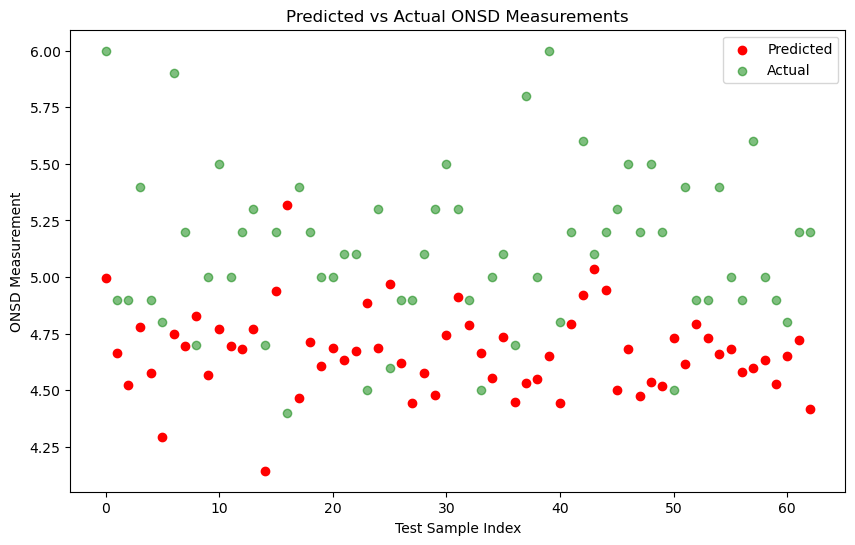

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(predictions)), predictions, color='r', label='Predicted')
plt.scatter(range(len(y_test)), y_test, color='g', alpha=0.5, label='Actual')
plt.title('Predicted vs Actual ONSD Measurements')
plt.xlabel('Test Sample Index')
plt.ylabel('ONSD Measurement')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.5190597503904313
Root Mean Square Error (RMSE): 0.5940379352532601


[[6.         4.996521  ]
 [4.9        4.66624355]
 [4.9        4.52169275]
 [5.4        4.77933407]
 [4.9        4.57469082]
 [4.8        4.29541302]
 [5.9        4.74843216]
 [5.2        4.69692278]
 [4.7        4.82994556]
 [5.         4.56605291]
 [5.5        4.77126789]
 [5.         4.69765043]
 [5.2        4.68347931]
 [5.3        4.76878738]
 [4.7        4.14453411]
 [5.2        4.93992519]
 [4.4        5.31950855]
 [5.4        4.46471643]
 [5.2        4.71252918]
 [5.         4.60507584]
 [5.         4.68752766]
 [5.1        4.63406992]
 [5.1        4.67192888]
 [4.5        4.88375378]
 [5.3        4.68608856]
 [4.6        4.96908092]
 [4.9        4.6200695 ]
 [4.9        4.44191647]
 [5.1        4.57444   ]
 [5.3        4.47775507]
 [5.5        4.74468708]
 [5.3        4.91186571]
 [4.9        4.78642178]
 [4.5        4.66369343]
 [5.         4.552001  ]
 [5.1        4.73332119]
 [4.7        4.44675493]
 [5.8        4.53286982]
 [5.         4.55031538]
 [6.         4.65203381]


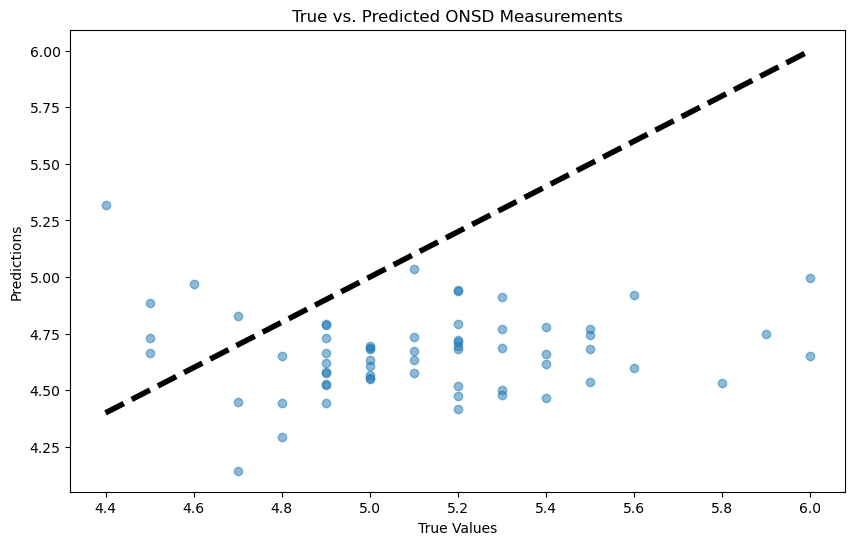

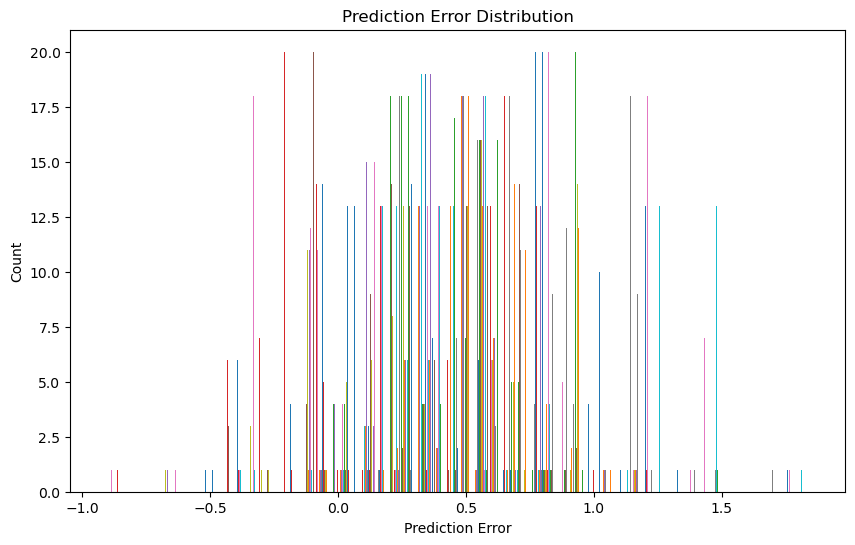

In [19]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is a numpy array of your model's predicted ONSD measurements
# and 'y_test' is the true ONSD measurements

# Compare predictions with actual values
comparison = np.column_stack((y_test, predictions))

# Print the first few comparisons to check
print(comparison[:64])

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted ONSD Measurements')
plt.show()

# Plotting the error distribution
errors = y_test - predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()


Trying a different architecture to see if it improves performance

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from keras.layers import Input  # Ensure you have this import

def build_enhanced_model():
    model = Sequential()
    model.add(Input(shape=(128, 128, 3)))  # Input layer with your data shape

    # Your convolutional layers (without input_shape arguments)
    model.add(Conv2D(32, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # ... more layers 

    # Dense and output layers 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1)) 

    return model



Building what I hope to be an enhanced model 

In [21]:
model = build_enhanced_model()
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Now you would train your model, perhaps with more epochs or different batch sizes
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 494ms/step - loss: 23.4673 - mae: 4.8262 - val_loss: 18.3648 - val_mae: 4.2665
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - loss: 16.6507 - mae: 4.0348 - val_loss: 11.8039 - val_mae: 3.3863
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - loss: 10.5854 - mae: 3.1548 - val_loss: 6.8622 - val_mae: 2.4934
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - loss: 6.5416 - mae: 2.3619 - val_loss: 3.7376 - val_mae: 1.7310
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - loss: 3.9001 - mae: 1.7202 - val_loss: 2.2934 - val_mae: 1.3147
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - loss: 2.7056 - mae: 1.3720 - val_loss: 2.0061 - val_mae: 1.1626
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - loss: 2.9277 - mae: 1.3953 - val_loss: 2.1234 - val_mae: 1.1170
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - loss: 2.9600 - mae: 1.3379 - val_loss: 2.1623 - val_mae: 1.1107
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - loss: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Mean Absolute Error (MAE): 0.3672633761451357
Mean Squared Error (MSE): 0.20984853115588648
Root Mean Squared Error (RMSE): 0.45809227362605287


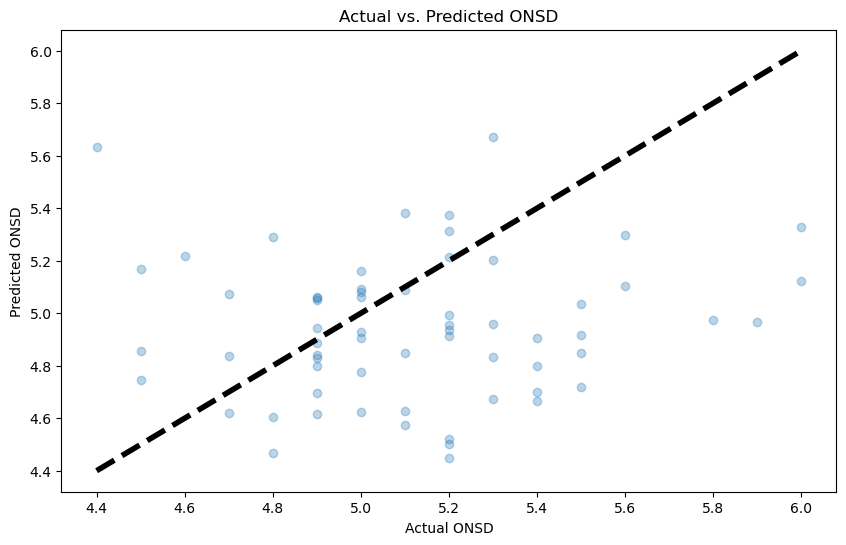

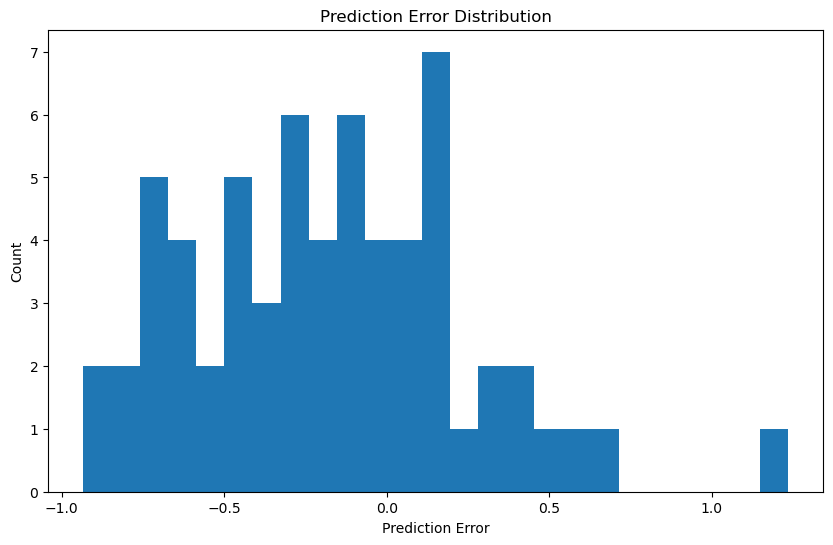

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X_test' and 'y_test' are your test datasets

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual ONSD')
plt.ylabel('Predicted ONSD')
plt.title('Actual vs. Predicted ONSD')
plt.show()

# Plotting the error distribution
errors = predictions.flatten() - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
# Save the figure
plt.savefig('C:/Users/parkera/OneDrive - phru.co.za/Pictures/MMED/Prediction.png')
plt.show()


In [23]:
# Assuming 'predictions' is a numpy array with the predicted ONSD values
# And 'y_test' is the actual ONSD measurements from the test set

# Convert predictions to a 1D array if it's not already
predictions = predictions.flatten()

# Create a DataFrame for a cleaner display
comparison_df = pd.DataFrame({'Actual ONSD': y_test, 'Predicted ONSD': predictions})

# Add a column for absolute error
comparison_df['Absolute Error'] = np.abs(comparison_df['Actual ONSD'] - comparison_df['Predicted ONSD'])

# Display several examples
print(comparison_df.head(64))


    Actual ONSD  Predicted ONSD  Absolute Error
0           6.0        5.329683        0.670317
1           4.9        4.885191        0.014809
2           4.9        4.694804        0.205196
3           5.4        4.905211        0.494789
4           4.9        4.614381        0.285619
..          ...             ...             ...
58          5.0        5.061274        0.061274
59          4.9        4.798620        0.101380
60          4.8        5.289269        0.489269
61          5.2        4.953663        0.246337
62          5.2        4.449965        0.750035

[63 rows x 3 columns]


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Add early stopping to halt training when validation loss increases
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with early stopping
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=60, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 475ms/step - loss: 1.6790 - mae: 1.0115 - val_loss: 0.7466 - val_mae: 0.7786
Epoch 2/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - loss: 0.9217 - mae: 0.7810 - val_loss: 0.1910 - val_mae: 0.3548
Epoch 3/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - loss: 0.6833 - mae: 0.6627 - val_loss: 0.3154 - val_mae: 0.4721
Epoch 4/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step - loss: 0.4642 - mae: 0.5267 - val_loss: 0.2327 - val_mae: 0.3880
Epoch 5/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 368ms/step - loss: 0.4567 - mae: 0.5386 - val_loss: 0.2072 - val_mae: 0.3653
Epoch 6/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - loss: 0.7133 - mae: 0.6881 - val_loss: 0.1892 - val_mae: 0.3468
Epoch 7/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 366ms/step - loss: 0.6608 - mae: 0.6537 - val_loss: 0.2154 - val_mae: 0.3637
Epoch 8/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step - loss: 0.5351 - mae: 0.5736 - val_loss: 0.2353 - val_mae: 0.3838
Epoch 9/60
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - loss: 0.5728 - mae: 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BECC394F40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Mean Absolute Error (MAE): 0.3162028267270043
Mean Squared Error (MSE): 0.1578960348436559
Root Mean Squared Error (RMSE): 0.39736134039895715


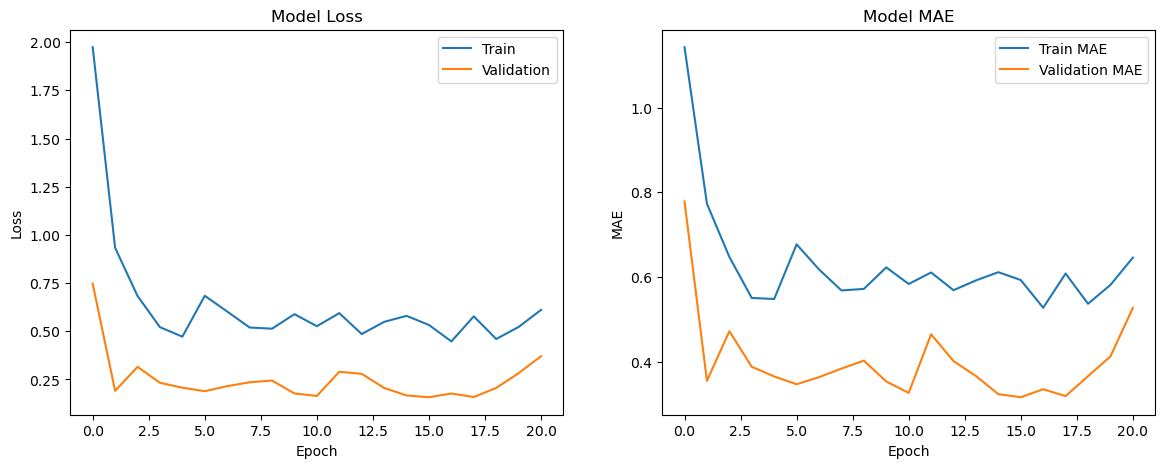

<Figure size 640x480 with 0 Axes>

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the training history
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

# Save the figure
plt.savefig('C:/Users/parkera/OneDrive - phru.co.za/Pictures/MMED/MAE.png')


In [26]:
# Create a DataFrame for a cleaner display
comparison_df = pd.DataFrame({'Actual ONSD': y_test, 'Predicted ONSD': predictions})

# Add a column for absolute error
comparison_df['Absolute Error'] = np.abs(comparison_df['Actual ONSD'] - comparison_df['Predicted ONSD'])

# Display several examples
print(comparison_df.head(64))

    Actual ONSD  Predicted ONSD  Absolute Error
0           6.0        5.658658        0.341342
1           4.9        5.170704        0.270704
2           4.9        5.031969        0.131969
3           5.4        5.157575        0.242425
4           4.9        4.807054        0.092946
..          ...             ...             ...
58          5.0        5.451274        0.451274
59          4.9        4.950741        0.050741
60          4.8        5.665350        0.865350
61          5.2        5.342736        0.142736
62          5.2        4.635049        0.564951

[63 rows x 3 columns]


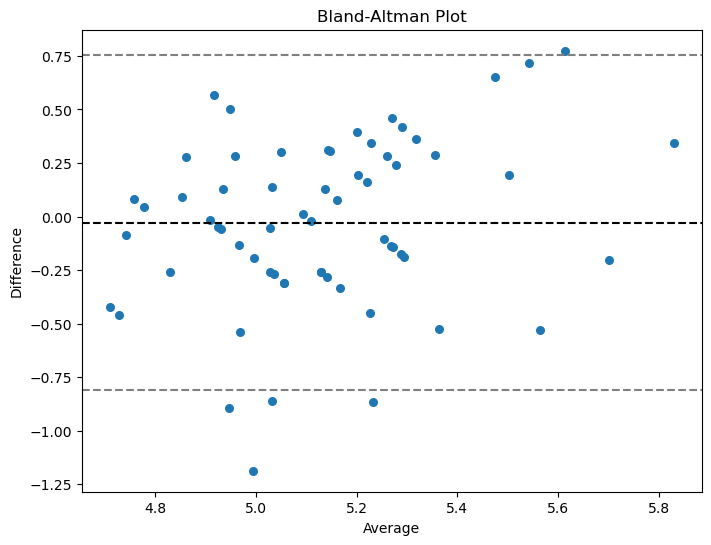

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame 'comparison_df'
df = comparison_df 

# Calculate differences and averages
df['Difference'] = df['Actual ONSD'] - df['Predicted ONSD']
df['Average'] = (df['Actual ONSD'] + df['Predicted ONSD']) / 2

# Calculate bias and limits of agreement
bias = df['Difference'].mean()
std_dev = df['Difference'].std()
upper_loa = bias + 1.96 * std_dev 
lower_loa = bias - 1.96 * std_dev

# Create the plot
plt.figure(figsize=(8,6)) 
plt.scatter(df['Average'], df['Difference'], s=30)
plt.xlabel('Average')
plt.ylabel('Difference')

plt.axhline(bias, color='black', linestyle='--') # Bias line
plt.axhline(upper_loa, color='gray', linestyle='--') # Upper LOA
plt.axhline(lower_loa, color='gray', linestyle='--') # Lower LOA

plt.title('Bland-Altman Plot')

# Save the figure
plt.savefig('C:/Users/parkera/OneDrive - phru.co.za/Pictures/MMED/bland_altman_plot.png')

# You can still display it if you want
plt.show() 

In [28]:
import pandas as pd

# load the 'df' DataFrame
print(df.head(64))

# Specify the save path
save_path = r"C:\Users\parkera\OneDrive - phru.co.za\Pictures\MMED\my_dataframe.csv"

# Save the DataFrame to CSV
df.to_csv(save_path, index=False) 

    Actual ONSD  Predicted ONSD  Absolute Error  Difference   Average
0           6.0        5.658658        0.341342    0.341342  5.829329
1           4.9        5.170704        0.270704   -0.270704  5.035352
2           4.9        5.031969        0.131969   -0.131969  4.965984
3           5.4        5.157575        0.242425    0.242425  5.278787
4           4.9        4.807054        0.092946    0.092946  4.853527
..          ...             ...             ...         ...       ...
58          5.0        5.451274        0.451274   -0.451274  5.225637
59          4.9        4.950741        0.050741   -0.050741  4.925370
60          4.8        5.665350        0.865350   -0.865350  5.232675
61          5.2        5.342736        0.142736   -0.142736  5.271368
62          5.2        4.635049        0.564951    0.564951  4.917525

[63 rows x 5 columns]


In [29]:
import pandas as pd

# Assuming you have your data in a DataFrame named 'df' (from your previous Bland-Altman code)

# Calculate the 10% margin around the bias
margin = 0.1  # 10%
bias = df['Difference'].mean()
upper_margin = bias + margin * bias
lower_margin = bias - margin * bias

# Check which points fall within the margin
within_margin = (df['Difference'] > lower_margin) & (df['Difference'] < upper_margin)

# Calculate the percentage
percentage_within_margin = (within_margin.sum() / len(df)) * 100

print("Percentage of data points within 10% margin of error:", percentage_within_margin)


Percentage of data points within 10% margin of error: 0.0


In [30]:
import pandas as pd

# Assuming you have your data in a DataFrame named 'df' (from your previous Bland-Altman code)

# Calculate the 5% margin around the bias
margin = 0.05  # 5%
bias = df['Difference'].mean()
upper_margin = bias + margin * bias
lower_margin = bias - margin * bias

# Check which points fall within the margin
within_margin = (df['Difference'] > lower_margin) & (df['Difference'] < upper_margin)

# Calculate the percentage
percentage_within_margin = (within_margin.sum() / len(df)) * 100

print("Percentage of data points within 5% margin of error:", percentage_within_margin)

Percentage of data points within 5% margin of error: 0.0


In [31]:
import pandas as pd

# Assuming you have your data in a DataFrame named 'df' (from your previous Bland-Altman code)

# Calculate the 25% margin around the bias
margin = 0.25  # 25%
bias = df['Difference'].mean()
upper_margin = bias + margin * bias
lower_margin = bias - margin * bias

# Check which points fall within the margin
within_margin = (df['Difference'] > lower_margin) & (df['Difference'] < upper_margin)

# Calculate the percentage
percentage_within_margin = (within_margin.sum() / len(df)) * 100

print("Percentage of data points within 25% margin of error:", percentage_within_margin)

Percentage of data points within 25% margin of error: 0.0


In [32]:
import pandas as pd

# Assuming you have your data in a DataFrame named 'df' (from your previous Bland-Altman code)

# Calculate the 50% margin around the bias
margin = 0.5  # 50%
bias = df['Difference'].mean()
upper_margin = bias + margin * bias
lower_margin = bias - margin * bias

# Check which points fall within the margin
within_margin = (df['Difference'] > lower_margin) & (df['Difference'] < upper_margin)

# Calculate the percentage
percentage_within_margin = (within_margin.sum() / len(df)) * 100

print("Percentage of data points within 50% margin of error:", percentage_within_margin)

Percentage of data points within 50% margin of error: 0.0


In [33]:
import pandas as pd

# Assuming you have your data in a DataFrame named 'df' (from your previous Bland-Altman code)

# Calculate the 75% margin around the bias
margin = 0.75  # 75%
bias = df['Difference'].mean()
upper_margin = bias + margin * bias
lower_margin = bias - margin * bias

# Check which points fall within the margin
within_margin = (df['Difference'] > lower_margin) & (df['Difference'] < upper_margin)

# Calculate the percentage
percentage_within_margin = (within_margin.sum() / len(df)) * 100

print("Percentage of data points within 75% margin of error:", percentage_within_margin)

Percentage of data points within 75% margin of error: 0.0


In [34]:
import pandas as pd

# Assuming you have your data in a DataFrame named 'df' (from your previous Bland-Altman code)

# Calculate the 100% margin around the bias
margin = 1  # 100%
bias = df['Difference'].mean()
upper_margin = bias + margin * bias
lower_margin = bias - margin * bias

# Check which points fall within the margin
within_margin = (df['Difference'] > lower_margin) & (df['Difference'] < upper_margin)

# Calculate the percentage
percentage_within_margin = (within_margin.sum() / len(df)) * 100

print("Percentage of data points within 100% margin of error:", percentage_within_margin)

Percentage of data points within 100% margin of error: 0.0


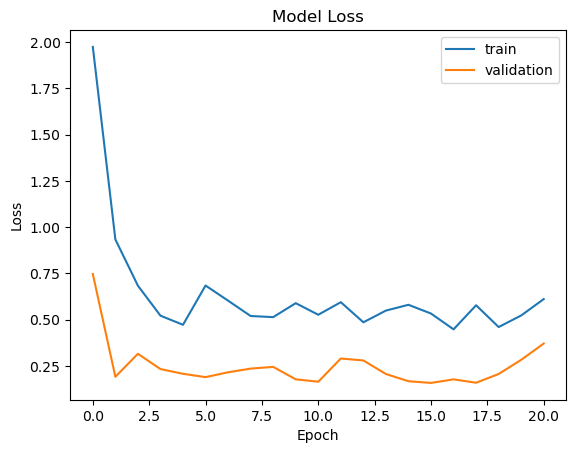

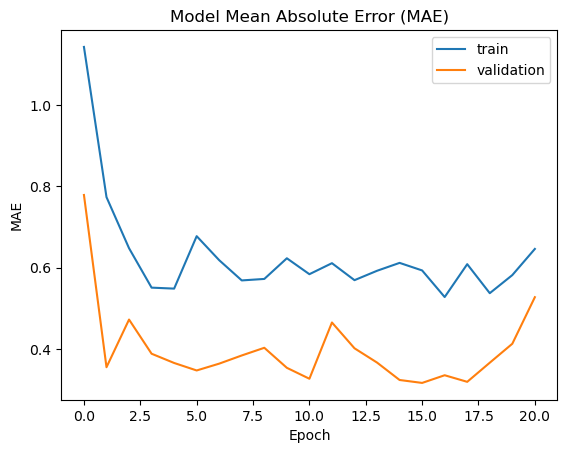

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Plot for MAE if relevant
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    30,482,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,506,245 (349.07 MB)

 Trainable params: 30,502,081 (116.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,004,164 (232.71 MB)